<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

## 📚 Libraries Import


In [1]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


# For evaluation
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Disable warnings [DataConversionWarning & ConvergenceWarning]
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

## 🧮 Import Databases

In [2]:
import pandas as pd
import os

# Define the path to your folder
load_path = r"C:\Users\sacar\OneDrive\Documents\Semester 1 NOVA\02_Machine_Learning\Project_ML"

# Load original numeric data (selected features only)
X_train_numeric = pd.read_csv(os.path.join(load_path, 'X_train_numeric.csv'))
X_val_numeric = pd.read_csv(os.path.join(load_path, 'X_val_numeric.csv'))
test_data_numeric = pd.read_csv(os.path.join(load_path, 'test_data_numeric.csv'))

# Load one-hot encoded data
X_train_ohe = pd.read_csv(os.path.join(load_path, 'X_train_ohe.csv'))
X_val_ohe = pd.read_csv(os.path.join(load_path, 'X_val_ohe.csv'))
test_data_ohe = pd.read_csv(os.path.join(load_path, 'test_data_ohe.csv'))

#Load y values
y_train = pd.read_csv(os.path.join(load_path, 'y_train.csv'))
y_val = pd.read_csv(os.path.join(load_path, 'y_val.csv'))

In [3]:
# Display the first 2 rows of each dataset
X_train_numeric.head(2) 

,Industry Code,First Hearing Date Binary,Weekly Wage Reported,IME-4 Reported,Accident Date Year,C-2 Date Year
0,56.0,1,0,0,2022.0,2022.0
1,62.0,0,1,1,2020.0,2020.0


In [4]:
test_data_numeric.head(2)

,Industry Code,First Hearing Date Binary,Weekly Wage Reported,IME-4 Reported,Accident Date Year,C-2 Date Year
0,48.0,1,0,0,2022.0,2023.0
1,45.0,1,0,0,2022.0,2023.0


In [5]:
X_train_ohe.head(2)

,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Attorney/Representative_Y,County of Injury_ALLEGANY,County of Injury_BRONX,County of Injury_BROOME,County of Injury_CATTARAUGUS,County of Injury_CAYUGA,County of Injury_CHAUTAUQUA,County of Injury_CHEMUNG,County of Injury_CHENANGO,County of Injury_CLINTON,County of Injury_COLUMBIA,County of Injury_CORTLAND,County of Injury_DELAWARE,County of Injury_DUTCHESS,County of Injury_ERIE,County of Injury_ESSEX,County of Injury_FRANKLIN,County of Injury_FULTON,County of Injury_GENESEE,County of Injury_GREENE,County of Injury_HAMILTON,County of Injury_HERKIMER,County of Injury_JEFFERSON,County of Injury_KINGS,County of Injury_LEWIS,County of Injury_LIVINGSTON,County of Injury_MADISON,County of Injury_MONROE,County of Injury_MONTGOMERY,County of Injury_NASSAU,County of Injury_NEW YORK,County of Injury_NIAGARA,County of Injury_ONEIDA,County of Injury_ONONDAGA,County of Injury_ONTARIO,County of Injury_ORANGE,County of Injury_ORLEANS,County of Injury_OSWEGO,County of Injury_OTSEGO,County of Injury_PUTNAM,County of Injury_QUEENS,County of Injury_RENSSELAER,County of Injury_RICHMOND,County of Injury_ROCKLAND,County of Injury_SARATOGA,County of Injury_SCHENECTADY,County of Injury_SCHOHARIE,County of Injury_SCHUYLER,County of Injury_SENECA,County of Injury_ST. LAWRENCE,County of Injury_STEUBEN,County of Injury_SUFFOLK,County of Injury_SULLIVAN,County of Injury_TIOGA,County of Injury_TOMPKINS,County of Injury_ULSTER,County of Injury_UNKNOWN,County of Injury_WARREN,County of Injury_WASHINGTON,County of Injury_WAYNE,County of Injury_WESTCHESTER,County of Injury_WYOMING,County of Injury_YATES,COVID-19 Indicator_Y,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Gender_U,Gender_X,Medical Fee Region_II,Medical Fee Region_III,Medical Fee Region_IV,Medical Fee Region_UK,Carrier Type Bucket_1A. PRIVATE,Carrier Type Bucket_2A. SIF,Carrier Type Bucket_3A. SELF PUBLIC,Carrier Type Bucket_4A. SELF PRIVATE,Carrier Type Bucket_5A-5C. SPECIAL FUND,WCIO Cause of Injury Bucket_1 - Temp,WCIO Cause of Injury Bucket_10 - Miscellaneous,WCIO Cause of Injury Bucket_2 - Caught,WCIO Cause of Injury Bucket_3 - Cut,WCIO Cause of Injury Bucket_4 - Fall,WCIO Cause of Injury Bucket_5 - Motor Vehicle,WCIO Cause of Injury Bucket_6 - Strain_data,WCIO Cause of Injury Bucket_7 - Striking,WCIO Cause of Injury Bucket_8 - Struck,WCIO Cause of Injury Bucket_9 - Rubbed,WCIO Nature of Injury Bucket_1 - Specific,WCIO Nature of Injury Bucket_2 - Occupational/Cumulative,WCIO Nature of Injury Bucket_3 - Multiple,WCIO Part of Body Bucket_I - Head,WCIO Part of Body Bucket_II - Neck,WCIO Part of Body Bucket_III - Upper Extremities,WCIO Part of Body Bucket_IV - Trunk,WCIO Part of Body Bucket_V - Lower Extremities,WCIO Part of Body Bucket_VI - Multiple Body Parts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>3 | Modeling & Evaluation</b></h1></center>
</div>

<br><br>

#### **📈📉 Data Normalization**

In [6]:
# Standardize the data [For the 'KNN' and 'Logistic Regression' models, let's normalize the variables]
# X_train = StandardScaler().fit_transform(X_train)
# X_validation = StandardScaler().fit_transform(X_validation)
# X_test = StandardScaler().fit_transform(X_test)

In [7]:
############################################ [TEMPORARY] ############################################
# Drop 'object' columns
#X_train = X_train.select_dtypes(exclude=['object'])
#X_val = X_val.select_dtypes(exclude=['object'])
#test_data = test_data.select_dtypes(exclude=['object'])
####################################################################################################

In [8]:
# Min-Max Normalization
#X_train_log_transformed = MinMaxScaler().fit_transform(X_train)
#X_validation_log_transformed = MinMaxScaler().fit_transform(X_val)
#X_test_norm = MinMaxScaler().fit_transform(test_data)

In [9]:
#Log Transformation - Why? Well, the data looks pretty skewed to me. haha.
# Log transformation (using log1p to handle zeros)
#X_train_log_transformed = np.log1p(X_train)
#X_validation_log_transformed = np.log1p(X_val)
#X_test_log_transformed = np.log1p(test_data)

In [10]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_train_scaled_minmax = min_max_scaler.fit_transform(X_train_numeric)
X_val_scaled_minmax = min_max_scaler.transform(X_val_numeric)
test_data_scaled_minmax = min_max_scaler.transform(test_data_numeric)

In [11]:

# Log Scaling (adding a small constant to avoid issues with zeroes)
X_train_scaled_log = np.log1p(X_train_numeric)
X_val_scaled_log = np.log1p(X_val_numeric)
test_data_scaled_log = np.log1p(test_data_numeric)

In [12]:

# Z-score Scaling
z_score_scaler = StandardScaler()
X_train_scaled_z = z_score_scaler.fit_transform(X_train_numeric)
X_val_scaled_z = z_score_scaler.transform(X_val_numeric)
test_data_scaled_z = z_score_scaler.transform(test_data_numeric)

# Combining Scaled numeric with ohe categorical

In [13]:
# Convert scaled numeric arrays back to DataFrames with original column names
X_train_scaled_minmax_df = pd.DataFrame(X_train_scaled_minmax, columns=X_train_numeric.columns, index=X_train_numeric.index)
X_val_scaled_minmax_df = pd.DataFrame(X_val_scaled_minmax, columns=X_val_numeric.columns, index=X_val_numeric.index)
test_data_scaled_minmax_df = pd.DataFrame(test_data_scaled_minmax, columns=test_data_numeric.columns, index=test_data_numeric.index)

# Concatenate scaled numeric DataFrames with the one-hot encoded DataFrames
X_train_minmax = pd.concat([X_train_scaled_minmax_df, X_train_ohe], axis=1)
X_val_minmax = pd.concat([X_val_scaled_minmax_df, X_val_ohe], axis=1)
test_data_minmax = pd.concat([test_data_scaled_minmax_df, test_data_ohe], axis=1)


In [14]:
X_train_minmax.head(2)

,Industry Code,First Hearing Date Binary,Weekly Wage Reported,IME-4 Reported,Accident Date Year,C-2 Date Year,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Attorney/Representative_Y,County of Injury_ALLEGANY,County of Injury_BRONX,County of Injury_BROOME,County of Injury_CATTARAUGUS,County of Injury_CAYUGA,County of Injury_CHAUTAUQUA,County of Injury_CHEMUNG,County of Injury_CHENANGO,County of Injury_CLINTON,County of Injury_COLUMBIA,County of Injury_CORTLAND,County of Injury_DELAWARE,County of Injury_DUTCHESS,County of Injury_ERIE,County of Injury_ESSEX,County of Injury_FRANKLIN,County of Injury_FULTON,County of Injury_GENESEE,County of Injury_GREENE,County of Injury_HAMILTON,County of Injury_HERKIMER,County of Injury_JEFFERSON,County of Injury_KINGS,County of Injury_LEWIS,County of Injury_LIVINGSTON,County of Injury_MADISON,County of Injury_MONROE,County of Injury_MONTGOMERY,County of Injury_NASSAU,County of Injury_NEW YORK,County of Injury_NIAGARA,County of Injury_ONEIDA,County of Injury_ONONDAGA,County of Injury_ONTARIO,County of Injury_ORANGE,County of Injury_ORLEANS,County of Injury_OSWEGO,County of Injury_OTSEGO,County of Injury_PUTNAM,County of Injury_QUEENS,County of Injury_RENSSELAER,County of Injury_RICHMOND,County of Injury_ROCKLAND,County of Injury_SARATOGA,County of Injury_SCHENECTADY,County of Injury_SCHOHARIE,County of Injury_SCHUYLER,County of Injury_SENECA,County of Injury_ST. LAWRENCE,County of Injury_STEUBEN,County of Injury_SUFFOLK,County of Injury_SULLIVAN,County of Injury_TIOGA,County of Injury_TOMPKINS,County of Injury_ULSTER,County of Injury_UNKNOWN,County of Injury_WARREN,County of Injury_WASHINGTON,County of Injury_WAYNE,County of Injury_WESTCHESTER,County of Injury_WYOMING,County of Injury_YATES,COVID-19 Indicator_Y,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Gender_U,Gender_X,Medical Fee Region_II,Medical Fee Region_III,Medical Fee Region_IV,Medical Fee Region_UK,Carrier Type Bucket_1A. PRIVATE,Carrier Type Bucket_2A. SIF,Carrier Type Bucket_3A. SELF PUBLIC,Carrier Type Bucket_4A. SELF PRIVATE,Carrier Type Bucket_5A-5C. SPECIAL FUND,WCIO Cause of Injury Bucket_1 - Temp,WCIO Cause of Injury Bucket_10 - Miscellaneous,WCIO Cause of Injury Bucket_2 - Caught,WCIO Cause of Injury Bucket_3 - Cut,WCIO Cause of Injury Bucket_4 - Fall,WCIO Cause of Injury Bucket_5 - Motor Vehicle,WCIO Cause of Injury Bucket_6 - Strain_data,WCIO Cause of Injury Bucket_7 - Striking,WCIO Cause of Injury Bucket_8 - Struck,WCIO Cause of Injury Bucket_9 - Rubbed,WCIO Nature of Injury Bucket_1 - Specific,WCIO Nature of Injury Bucket_2 - Occupational/Cumulative,WCIO Nature of Injury Bucket_3 - Multiple,WCIO Part of Body Bucket_I - Head,WCIO Part of Body Bucket_II - Neck,WCIO Part of Body Bucket_III - Upper Extremities,WCIO Part of Body Bucket_IV - Trunk,WCIO Part of Body Bucket_V - Lower Extremities,WCIO Part of Body Bucket_VI - Multiple Body Parts
0,0.608696,1.0,0.0,0.0,0.983871,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.673913,0.0,1.0,1.0,0.951613,0.857143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
X_train_minmax.columns

Index(['Industry Code', 'First Hearing Date Binary', 'Weekly Wage Reported',
       'IME-4 Reported', 'Accident Date Year', 'C-2 Date Year',
       'Alternative Dispute Resolution_U', 'Alternative Dispute Resolution_Y',
       'Attorney/Representative_Y', 'County of Injury_ALLEGANY',
       ...
       'WCIO Cause of Injury Bucket_9 - Rubbed',
       'WCIO Nature of Injury Bucket_1 - Specific',
       'WCIO Nature of Injury Bucket_2 - Occupational/Cumulative',
       'WCIO Nature of Injury Bucket_3 - Multiple',
       'WCIO Part of Body Bucket_I - Head',
       'WCIO Part of Body Bucket_II - Neck',
       'WCIO Part of Body Bucket_III - Upper Extremities',
       'WCIO Part of Body Bucket_IV - Trunk',
       'WCIO Part of Body Bucket_V - Lower Extremities',
       'WCIO Part of Body Bucket_VI - Multiple Body Parts'],
      dtype='object', length=110)

In [16]:
# Convert log-scaled numeric arrays back to DataFrames with original column names and indices
X_train_scaled_log_df = pd.DataFrame(X_train_scaled_log, columns=X_train_numeric.columns, index=X_train_numeric.index)
X_val_scaled_log_df = pd.DataFrame(X_val_scaled_log, columns=X_val_numeric.columns, index=X_val_numeric.index)
test_data_scaled_log_df = pd.DataFrame(test_data_scaled_log, columns=test_data_numeric.columns, index=test_data_numeric.index)

# Concatenate log-scaled numeric DataFrames with the one-hot encoded DataFrames
X_train_log = pd.concat([X_train_scaled_log_df, X_train_ohe], axis=1)
X_val_log = pd.concat([X_val_scaled_log_df, X_val_ohe], axis=1)
test_data_log = pd.concat([test_data_scaled_log_df, test_data_ohe], axis=1)


In [17]:
X_train_log.head(2)

,Industry Code,First Hearing Date Binary,Weekly Wage Reported,IME-4 Reported,Accident Date Year,C-2 Date Year,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Attorney/Representative_Y,County of Injury_ALLEGANY,County of Injury_BRONX,County of Injury_BROOME,County of Injury_CATTARAUGUS,County of Injury_CAYUGA,County of Injury_CHAUTAUQUA,County of Injury_CHEMUNG,County of Injury_CHENANGO,County of Injury_CLINTON,County of Injury_COLUMBIA,County of Injury_CORTLAND,County of Injury_DELAWARE,County of Injury_DUTCHESS,County of Injury_ERIE,County of Injury_ESSEX,County of Injury_FRANKLIN,County of Injury_FULTON,County of Injury_GENESEE,County of Injury_GREENE,County of Injury_HAMILTON,County of Injury_HERKIMER,County of Injury_JEFFERSON,County of Injury_KINGS,County of Injury_LEWIS,County of Injury_LIVINGSTON,County of Injury_MADISON,County of Injury_MONROE,County of Injury_MONTGOMERY,County of Injury_NASSAU,County of Injury_NEW YORK,County of Injury_NIAGARA,County of Injury_ONEIDA,County of Injury_ONONDAGA,County of Injury_ONTARIO,County of Injury_ORANGE,County of Injury_ORLEANS,County of Injury_OSWEGO,County of Injury_OTSEGO,County of Injury_PUTNAM,County of Injury_QUEENS,County of Injury_RENSSELAER,County of Injury_RICHMOND,County of Injury_ROCKLAND,County of Injury_SARATOGA,County of Injury_SCHENECTADY,County of Injury_SCHOHARIE,County of Injury_SCHUYLER,County of Injury_SENECA,County of Injury_ST. LAWRENCE,County of Injury_STEUBEN,County of Injury_SUFFOLK,County of Injury_SULLIVAN,County of Injury_TIOGA,County of Injury_TOMPKINS,County of Injury_ULSTER,County of Injury_UNKNOWN,County of Injury_WARREN,County of Injury_WASHINGTON,County of Injury_WAYNE,County of Injury_WESTCHESTER,County of Injury_WYOMING,County of Injury_YATES,COVID-19 Indicator_Y,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Gender_U,Gender_X,Medical Fee Region_II,Medical Fee Region_III,Medical Fee Region_IV,Medical Fee Region_UK,Carrier Type Bucket_1A. PRIVATE,Carrier Type Bucket_2A. SIF,Carrier Type Bucket_3A. SELF PUBLIC,Carrier Type Bucket_4A. SELF PRIVATE,Carrier Type Bucket_5A-5C. SPECIAL FUND,WCIO Cause of Injury Bucket_1 - Temp,WCIO Cause of Injury Bucket_10 - Miscellaneous,WCIO Cause of Injury Bucket_2 - Caught,WCIO Cause of Injury Bucket_3 - Cut,WCIO Cause of Injury Bucket_4 - Fall,WCIO Cause of Injury Bucket_5 - Motor Vehicle,WCIO Cause of Injury Bucket_6 - Strain_data,WCIO Cause of Injury Bucket_7 - Striking,WCIO Cause of Injury Bucket_8 - Struck,WCIO Cause of Injury Bucket_9 - Rubbed,WCIO Nature of Injury Bucket_1 - Specific,WCIO Nature of Injury Bucket_2 - Occupational/Cumulative,WCIO Nature of Injury Bucket_3 - Multiple,WCIO Part of Body Bucket_I - Head,WCIO Part of Body Bucket_II - Neck,WCIO Part of Body Bucket_III - Upper Extremities,WCIO Part of Body Bucket_IV - Trunk,WCIO Part of Body Bucket_V - Lower Extremities,WCIO Part of Body Bucket_VI - Multiple Body Parts
0,4.043051,0.693147,0.000000,0.000000,7.612337,7.612337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.143135,0.000000,0.693147,0.693147,7.611348,7.611348,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
# Convert Z-score scaled numeric arrays back to DataFrames with original column names and indices
X_train_scaled_z_df = pd.DataFrame(X_train_scaled_z, columns=X_train_numeric.columns, index=X_train_numeric.index)
X_val_scaled_z_df = pd.DataFrame(X_val_scaled_z, columns=X_val_numeric.columns, index=X_val_numeric.index)
test_data_scaled_z_df = pd.DataFrame(test_data_scaled_z, columns=test_data_numeric.columns, index=test_data_numeric.index)

# Concatenate Z-score scaled numeric DataFrames with the one-hot encoded DataFrames
X_train_zscore = pd.concat([X_train_scaled_z_df, X_train_ohe], axis=1)
X_val_zscore = pd.concat([X_val_scaled_z_df, X_val_ohe], axis=1)
test_data_zscore = pd.concat([test_data_scaled_z_df, test_data_ohe], axis=1)

In [19]:
X_train_zscore.head(2)

,Industry Code,First Hearing Date Binary,Weekly Wage Reported,IME-4 Reported,Accident Date Year,C-2 Date Year,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Attorney/Representative_Y,County of Injury_ALLEGANY,County of Injury_BRONX,County of Injury_BROOME,County of Injury_CATTARAUGUS,County of Injury_CAYUGA,County of Injury_CHAUTAUQUA,County of Injury_CHEMUNG,County of Injury_CHENANGO,County of Injury_CLINTON,County of Injury_COLUMBIA,County of Injury_CORTLAND,County of Injury_DELAWARE,County of Injury_DUTCHESS,County of Injury_ERIE,County of Injury_ESSEX,County of Injury_FRANKLIN,County of Injury_FULTON,County of Injury_GENESEE,County of Injury_GREENE,County of Injury_HAMILTON,County of Injury_HERKIMER,County of Injury_JEFFERSON,County of Injury_KINGS,County of Injury_LEWIS,County of Injury_LIVINGSTON,County of Injury_MADISON,County of Injury_MONROE,County of Injury_MONTGOMERY,County of Injury_NASSAU,County of Injury_NEW YORK,County of Injury_NIAGARA,County of Injury_ONEIDA,County of Injury_ONONDAGA,County of Injury_ONTARIO,County of Injury_ORANGE,County of Injury_ORLEANS,County of Injury_OSWEGO,County of Injury_OTSEGO,County of Injury_PUTNAM,County of Injury_QUEENS,County of Injury_RENSSELAER,County of Injury_RICHMOND,County of Injury_ROCKLAND,County of Injury_SARATOGA,County of Injury_SCHENECTADY,County of Injury_SCHOHARIE,County of Injury_SCHUYLER,County of Injury_SENECA,County of Injury_ST. LAWRENCE,County of Injury_STEUBEN,County of Injury_SUFFOLK,County of Injury_SULLIVAN,County of Injury_TIOGA,County of Injury_TOMPKINS,County of Injury_ULSTER,County of Injury_UNKNOWN,County of Injury_WARREN,County of Injury_WASHINGTON,County of Injury_WAYNE,County of Injury_WESTCHESTER,County of Injury_WYOMING,County of Injury_YATES,COVID-19 Indicator_Y,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Gender_U,Gender_X,Medical Fee Region_II,Medical Fee Region_III,Medical Fee Region_IV,Medical Fee Region_UK,Carrier Type Bucket_1A. PRIVATE,Carrier Type Bucket_2A. SIF,Carrier Type Bucket_3A. SELF PUBLIC,Carrier Type Bucket_4A. SELF PRIVATE,Carrier Type Bucket_5A-5C. SPECIAL FUND,WCIO Cause of Injury Bucket_1 - Temp,WCIO Cause of Injury Bucket_10 - Miscellaneous,WCIO Cause of Injury Bucket_2 - Caught,WCIO Cause of Injury Bucket_3 - Cut,WCIO Cause of Injury Bucket_4 - Fall,WCIO Cause of Injury Bucket_5 - Motor Vehicle,WCIO Cause of Injury Bucket_6 - Strain_data,WCIO Cause of Injury Bucket_7 - Striking,WCIO Cause of Injury Bucket_8 - Struck,WCIO Cause of Injury Bucket_9 - Rubbed,WCIO Nature of Injury Bucket_1 - Specific,WCIO Nature of Injury Bucket_2 - Occupational/Cumulative,WCIO Nature of Injury Bucket_3 - Multiple,WCIO Part of Body Bucket_I - Head,WCIO Part of Body Bucket_II - Neck,WCIO Part of Body Bucket_III - Upper Extremities,WCIO Part of Body Bucket_IV - Trunk,WCIO Part of Body Bucket_V - Lower Extremities,WCIO Part of Body Bucket_VI - Multiple Body Parts
0,-0.077967,0.596950,-0.759646,-0.549211,0.631088,0.878128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.208821,-1.675181,1.316403,1.820793,-0.445778,-0.954454,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# **💡 Modeling**

In [20]:
# Function that will print the results of the classification report and the confusion matrix for both datasets (train and validation)
# Additionally, it will save results in a dictionary to compare the results of different models

models_results_train = {}
models_results_val = {}

def classification_metrics(model_name, cv_results,
                           y_train, pred_train, pred_train_proba, 
                           y_val, pred_val, pred_val_proba, classification_report=True):
    
    # Display model name
    display_html(f'<h1 style="text-align: left; margin-bottom: -15px;">{model_name}</h1><br>', raw=True)

    # Display the results of the cross-validation (KFold) - If classification_report=True
    if classification_report:
        # ------------------------------------- Classification Report  -------------------------------------
        print('___________________________________________________________________________________________________________')
        print('                                                     TRAIN                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_train, pred_train, target_names=[str(i) for i in np.unique(y_train)], zero_division=1))  
        # zero_division=1 to avoid warnings -> y_true contains labels that are not present in your predictions (y_pred)
        print('\nAUROC:', round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)) # 'ovr' for multiclass

        print('___________________________________________________________________________________________________________')
        print('                                                VALIDATION                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_val, pred_val, target_names=[str(i) for i in np.unique(y_val)], zero_division=1))
        print('\nAUROC:', round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2))  # 'ovr' for multiclass
    
    # ----------------------------------- Confusion Matrix for Train and Validation side by side -----------------------------------

    # Confusion Matrix for Train and Validation side by side
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    sns.heatmap(confusion_matrix(y_train, pred_train, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7}, 
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val), ax=ax[0])
    ax[0].set_title('Confusion Matrix [Train]\n', fontsize=12, fontweight='bold')
    ax[0].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[0].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[0].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    sns.heatmap(confusion_matrix(y_val, pred_val, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7},
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val),ax=ax[1])
    ax[1].set_title('Confusion Matrix [Validation]\n', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[1].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[1].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

    # ----------------------------------- Save the results in a dictionary -----------------------------------
    # List of All Metrics for Classification Problems - Accuracy, Precision, Recall, F1 Score Macro (Kaggle Bechmark), ROC-AUC
    models_results_train[model_name] = {
        'Time of Execution (KFold)': str(cv_results['fit_time'].sum().round(2)) + ' +/-' + str(round(np.std(np.array(cv_results['fit_time'])), 2)),
        'Accuracy': round(accuracy_score(y_train, pred_train), 2),
        'Precision': round(metrics.precision_score(y_train, pred_train, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_train, pred_train, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_train, pred_train, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)
    }

    models_results_val[model_name] = {
        'Accuracy': round(accuracy_score(y_val, pred_val), 2),
        'Precision': round(metrics.precision_score(y_val, pred_val, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_val, pred_val, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_val, pred_val, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2)
    }

---

### **Logistic Regression[<sup>[1]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [20]:
# Logistic Regression w/ minmax
lr = LogisticRegression()
cv = cross_val_score(lr,X_train_minmax,y_train,cv=5)

# Train the model
lr.fit(X_train_minmax, y_train)

# Test the model [on the train set]
lr_predicted_prob_train = lr.predict_proba(X_train_minmax)
lr_predicted_train = lr.predict(X_train_minmax)
lr_y_proba_train = lr.predict_proba(X_train_minmax)

# Accuracy
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, lr_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, lr_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, lr_predicted_train, average='macro'), 2))

# Test the model [on the validation set]
lr_predicted_val_prob = lr.predict_proba(X_val_minmax)
lr_predicted_val = lr.predict(X_val_minmax)
lr_y_proba = lr.predict_proba(X_val_minmax)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, lr_predicted_val),2))
print("Validation | AUC:", round(roc_auc_score(y_val, lr_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, lr_predicted_val, average='macro'), 2))

Train | Accuracy (overall correct predictions): 0.77
Train | AUC: 0.91
Train | F1-Score (macro): 0.35
Validation | Accuracy (overall correct predictions): 0.77
Validation | AUC: 0.91
Validation | F1-Score (macro): 0.35


In [13]:
# Logistic Regression w/ zscore
lr = LogisticRegression()
cv = cross_val_score(lr,X_train_zscore,y_train,cv=5)

# Train the model
lr.fit(X_train_zscore, y_train)

# Test the model [on the train set]
lr_predicted_prob_train = lr.predict_proba(X_train_zscore)
lr_predicted_train = lr.predict(X_train_zscore)
lr_y_proba_train = lr.predict_proba(X_train_zscore)

# Accuracy
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, lr_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, lr_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, lr_predicted_train, average='macro'), 2))

# Test the model [on the validation set]
lr_predicted_val_prob = lr.predict_proba(X_val_zscore)
lr_predicted_val = lr.predict(X_val_zscore)
lr_y_proba = lr.predict_proba(X_val_zscore)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, lr_predicted_val),2))
print("Validation | AUC:", round(roc_auc_score(y_val, lr_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, lr_predicted_val, average='macro'), 2))

Train | Accuracy (overall correct predictions): 0.77
Train | AUC: 0.92
Train | F1-Score (macro): 0.35
Validation | Accuracy (overall correct predictions): 0.77
Validation | AUC: 0.91
Validation | F1-Score (macro): 0.35


In [14]:
# Logistic Regression w/ log
lr = LogisticRegression()
cv = cross_val_score(lr,X_train_log,y_train,cv=5)

# Train the model
lr.fit(X_train_log, y_train)

# Test the model [on the train set]
lr_predicted_prob_train = lr.predict_proba(X_train_log)
lr_predicted_train = lr.predict(X_train_log)
lr_y_proba_train = lr.predict_proba(X_train_log)

# Accuracy
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, lr_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, lr_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, lr_predicted_train, average='macro'), 2))

# Test the model [on the validation set]
lr_predicted_val_prob = lr.predict_proba(X_val_log)
lr_predicted_val = lr.predict(X_val_log)
lr_y_proba = lr.predict_proba(X_val_log)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, lr_predicted_val),2))
print("Validation | AUC:", round(roc_auc_score(y_val, lr_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, lr_predicted_val, average='macro'), 2))

Train | Accuracy (overall correct predictions): 0.76
Train | AUC: 0.88
Train | F1-Score (macro): 0.35
Validation | Accuracy (overall correct predictions): 0.76
Validation | AUC: 0.88
Validation | F1-Score (macro): 0.35


In [21]:
# Classification Metrics & Confusion Matrix
classification_metrics(y_train, lr_predicted_train, lr_predicted_prob_train, y_val, lr_predicted_val, lr_predicted_val_prob)

TypeError: classification_metrics() missing 2 required positional arguments: 'pred_val' and 'pred_val_proba'

### **Naive Bayes[<sup>[2]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)**

In [22]:
# Naive Bayes w/ minmax
nb = GaussianNB()
cv = cross_val_score(nb,X_train_minmax,y_train,cv=5)

# Train the model
nb.fit(X_train_minmax, y_train)

# Test the model [on the Train set]
nb_predicted_prob_train = nb.predict_proba(X_train_minmax)
nb_predicted_train = nb.predict(X_train_minmax)
nb_y_proba_train = nb.predict_proba(X_train_minmax)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, nb_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, nb_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, nb_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
nb_predicted_prob = nb.predict_proba(X_val_minmax)
nb_predicted = nb.predict(X_val_minmax)
nb_y_proba = nb.predict_proba(X_val_minmax)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, nb_predicted),2))
print("Validation | AUC:", round(roc_auc_score(y_val, nb_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, nb_predicted, average='macro'), 2))

Train | Accuracy (overall correct predictions): 0.17
Train | AUC: 0.64
Train | F1-Score (macro): 0.12
Validation | Accuracy (overall correct predictions): 0.17
Validation | AUC: 0.62
Validation | F1-Score (macro): 0.12


In [15]:
# Naive Bayes w/ zscore
nb = GaussianNB()
cv = cross_val_score(nb,X_train_zscore,y_train,cv=5)

# Train the model
nb.fit(X_train_zscore, y_train)

# Test the model [on the Train set]
nb_predicted_prob_train = nb.predict_proba(X_train_zscore)
nb_predicted_train = nb.predict(X_train_zscore)
nb_y_proba_train = nb.predict_proba(X_train_zscore)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, nb_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, nb_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, nb_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
nb_predicted_prob = nb.predict_proba(X_val_zscore)
nb_predicted = nb.predict(X_val_zscore)
nb_y_proba = nb.predict_proba(X_val_zscore)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, nb_predicted),2))
print("Validation | AUC:", round(roc_auc_score(y_val, nb_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, nb_predicted, average='macro'), 2))

Train | Accuracy (overall correct predictions): 0.19
Train | AUC: 0.64
Train | F1-Score (macro): 0.13
Validation | Accuracy (overall correct predictions): 0.19
Validation | AUC: 0.63
Validation | F1-Score (macro): 0.13


In [16]:
# Naive Bayes w/ log
nb = GaussianNB()
cv = cross_val_score(nb,X_train_log,y_train,cv=5)

# Train the model
nb.fit(X_train_log, y_train)

# Test the model [on the Train set]
nb_predicted_prob_train = nb.predict_proba(X_train_log)
nb_predicted_train = nb.predict(X_train_log)
nb_y_proba_train = nb.predict_proba(X_train_log)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, nb_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, nb_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, nb_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
nb_predicted_prob = nb.predict_proba(X_val_log)
nb_predicted = nb.predict(X_val_log)
nb_y_proba = nb.predict_proba(X_val_log)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, nb_predicted),2))
print("Validation | AUC:", round(roc_auc_score(y_val, nb_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, nb_predicted, average='macro'), 2))

Train | Accuracy (overall correct predictions): 0.18
Train | AUC: 0.64
Train | F1-Score (macro): 0.12
Validation | Accuracy (overall correct predictions): 0.18
Validation | AUC: 0.63
Validation | F1-Score (macro): 0.12


In [ ]:
# Classification Metrics & Confusion Matrix
classification_metrics(y_train, nb_predicted_train, nb_predicted_prob_train, y_val, nb_predicted, nb_predicted_prob)

### **K-Nearest Neighbors (KNN)[<sup>[3]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**

In [17]:
# KNN | K-Nearest Neighbors w/minmax
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_minmax,y_train,cv=5)

# Train the model
knn.fit(X_train_minmax, y_train)

# Test the model [on the Train set]
knn_predicted_prob_train = knn.predict_proba(X_train_minmax)
knn_predicted_train = knn.predict(X_train_minmax)
knn_y_proba_train = knn.predict_proba(X_train_minmax)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, knn_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, knn_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, knn_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
knn_predicted_prob = knn.predict_proba(X_val_minmax)
knn_predicted = knn.predict(X_val_minmax)
knn_y_proba = knn.predict_proba(X_val_minmax)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, knn_predicted),2))
print("Validation | AUC:", round(roc_auc_score(y_val, knn_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, knn_predicted, average='macro'), 2))

Train | Accuracy (overall correct predictions): 0.8
Train | AUC: 0.96
Train | F1-Score (macro): 0.44
Validation | Accuracy (overall correct predictions): 0.74
Validation | AUC: 0.74
Validation | F1-Score (macro): 0.37


In [10]:
# KNN | K-Nearest Neighbors KD Tree w/zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Initialize KNN with KD-Tree algorithm
knn = KNeighborsClassifier(algorithm='kd_tree')

# Cross-validation
cv = cross_val_score(knn, X_train_zscore, y_train, cv=5)

# Train the model
knn.fit(X_train_zscore, y_train)

# Test the model [on the Train set]
knn_predicted_prob_train = knn.predict_proba(X_train_zscore)
knn_predicted_train = knn.predict(X_train_zscore)
knn_y_proba_train = knn.predict_proba(X_train_zscore)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, knn_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, knn_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, knn_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
knn_predicted_prob = knn.predict_proba(X_val_zscore)
knn_predicted = knn.predict(X_val_zscore)
knn_y_proba = knn.predict_proba(X_val_zscore)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, knn_predicted), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, knn_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, knn_predicted, average='macro'), 2))


Train | Accuracy (overall correct predictions): 0.81
Train | AUC: 0.96
Train | F1-Score (macro): 0.44
Validation | Accuracy (overall correct predictions): 0.75
Validation | AUC: 0.74
Validation | F1-Score (macro): 0.36


In [ ]:
# KNN | K-Nearest Neighbors w/ zscore
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_zscore,y_train,cv=5)

# Train the model
knn.fit(X_train_zscore, y_train)

# Test the model [on the Train set]
knn_predicted_prob_train = knn.predict_proba(X_train_zscore)
knn_predicted_train = knn.predict(X_train_zscore)
knn_y_proba_train = knn.predict_proba(X_train_zscore)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, knn_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, knn_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, knn_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
knn_predicted_prob = knn.predict_proba(X_val_zscore)
knn_predicted = knn.predict(X_val_zscore)
knn_y_proba = knn.predict_proba(X_val_zscore)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, knn_predicted),2))
print("Validation | AUC:", round(roc_auc_score(y_val, knn_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, knn_predicted, average='macro'), 2))

Train | Accuracy (overall correct predictions): 0.81
Train | AUC: 0.96
Train | F1-Score (macro): 0.44


In [ ]:
# KNN | K-Nearest Neighbors w/ log
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_log,y_train,cv=5)

# Train the model
knn.fit(X_train_log, y_train)

# Test the model [on the Train set]
knn_predicted_prob_train = knn.predict_proba(X_train_log)
knn_predicted_train = knn.predict(X_train_log)
knn_y_proba_train = knn.predict_proba(X_train_log)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, knn_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, knn_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, knn_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
knn_predicted_prob = knn.predict_proba(X_val_log)
knn_predicted = knn.predict(X_val_log)
knn_y_proba = knn.predict_proba(X_val_log)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, knn_predicted),2))
print("Validation | AUC:", round(roc_auc_score(y_val, knn_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, knn_predicted, average='macro'), 2))

In [ ]:
# KNN | K-Nearest Neighbors w/log
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_minmax,y_train,cv=5)

# Train the model
knn.fit(X_train_log, y_train)

# Test the model [on the Train set]
knn_predicted_prob_train = knn.predict_proba(X_train_log)
knn_predicted_train = knn.predict(X_train_log)
knn_y_proba_train = knn.predict_proba(X_train_log)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, knn_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, knn_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, knn_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
knn_predicted_prob = knn.predict_proba(X_val_log)
knn_predicted = knn.predict(X_val_log)
knn_y_proba = knn.predict_proba(X_val_log)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, knn_predicted),2))
print("Validation | AUC:", round(roc_auc_score(y_val, knn_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, knn_predicted, average='macro'), 2))

In [ ]:
# KNN | K-Nearest Neighbors KD Tree w/log
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Initialize KNN with KD-Tree algorithm
knn = KNeighborsClassifier(algorithm='kd_tree')

# Cross-validation
cv = cross_val_score(knn, X_train_log, y_train, cv=5)

# Train the model
knn.fit(X_train_log, y_train)

# Test the model [on the Train set]
knn_predicted_prob_train = knn.predict_proba(X_train_log)
knn_predicted_train = knn.predict(X_train_log)
knn_y_proba_train = knn.predict_proba(X_train_log)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, knn_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, knn_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, knn_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
knn_predicted_prob = knn.predict_proba(X_val_log)
knn_predicted = knn.predict(X_val_log)
knn_y_proba = knn.predict_proba(X_val_log)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, knn_predicted), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, knn_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, knn_predicted, average='macro'), 2))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.68      0.43      0.53      9358
           2       0.81      0.98      0.89    218308
           3       0.56      0.20      0.29     51679
           4       0.73      0.80      0.76    111380
           5       0.72      0.41      0.53     36210
           6       0.49      0.03      0.06      3158
           7       1.00      0.00      0.00        73
           8       0.91      0.03      0.05       353

    accuracy                           0.77    430519
   macro avg       0.74      0.36      0.39    430519
weighted avg       0.75      0.77      0.74    430519


AUROC: 0.96
____________

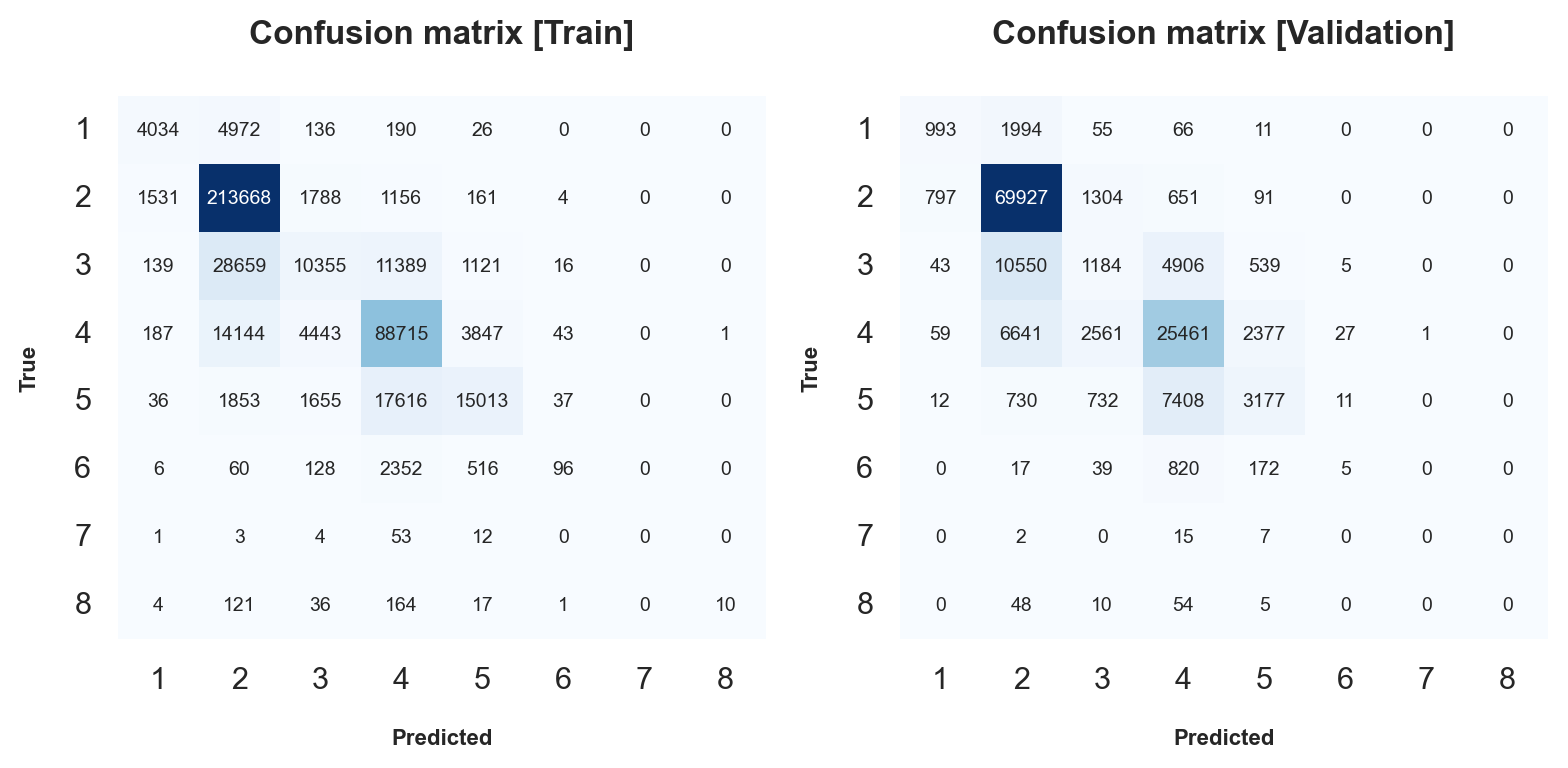

In [14]:
# Classification Metrics & Confusion Matrix
classification_metrics(y_train, knn_predicted_train, knn_predicted_prob_train, y_val, knn_predicted, knn_predicted_prob)

### **Decision Tree[<sup>[4]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**

In [33]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Cross-validation on the training set
cv = cross_val_score(decision_tree, X_train_minmax, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
decision_tree.fit(X_train_minmax, y_train)

# Test the model on the Train set
dt_predicted_prob_train = decision_tree.predict_proba(X_train_minmax)
dt_predicted_train = decision_tree.predict(X_train_minmax)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, dt_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, dt_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, dt_predicted_train, average='macro'), 2))

# Test the model on the Validation set
dt_predicted_prob = decision_tree.predict_proba(X_val_minmax)
dt_predicted = decision_tree.predict(X_val_minmax)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, dt_predicted), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, dt_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, dt_predicted, average='macro'), 2))

Cross-Validation Scores: [0.7050079  0.70736551 0.70421815 0.70441559 0.704447  ]
Train | Accuracy (overall correct predictions): 0.93
Train | AUC: 1.0
Train | F1-Score (macro): 0.88
Validation | Accuracy (overall correct predictions): 0.71
Validation | AUC: 0.67
Validation | F1-Score (macro): 0.36


In [34]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Cross-validation on the training set
cv = cross_val_score(decision_tree, X_train_zscore, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
decision_tree.fit(X_train_zscore, y_train)

# Test the model on the Train set
dt_predicted_prob_train = decision_tree.predict_proba(X_train_zscore)
dt_predicted_train = decision_tree.predict(X_train_zscore)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, dt_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, dt_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, dt_predicted_train, average='macro'), 2))

# Test the model on the Validation set
dt_predicted_prob = decision_tree.predict_proba(X_val_zscore)
dt_predicted = decision_tree.predict(X_val_zscore)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, dt_predicted), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, dt_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, dt_predicted, average='macro'), 2))

Cross-Validation Scores: [0.70497306 0.70747004 0.70427622 0.70441559 0.70450507]
Train | Accuracy (overall correct predictions): 0.93
Train | AUC: 1.0
Train | F1-Score (macro): 0.88
Validation | Accuracy (overall correct predictions): 0.71
Validation | AUC: 0.67
Validation | F1-Score (macro): 0.36


In [35]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Cross-validation on the training set
cv = cross_val_score(decision_tree, X_train_zscore, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
decision_tree.fit(X_train_log, y_train)

# Test the model on the Train set
dt_predicted_prob_train = decision_tree.predict_proba(X_train_log)
dt_predicted_train = decision_tree.predict(X_train_log)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, dt_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, dt_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, dt_predicted_train, average='macro'), 2))

# Test the model on the Validation set
dt_predicted_prob = decision_tree.predict_proba(X_val_log)
dt_predicted = decision_tree.predict(X_val_log)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, dt_predicted), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, dt_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, dt_predicted, average='macro'), 2))

Cross-Validation Scores: [0.70497306 0.70747004 0.70427622 0.70441559 0.70450507]
Train | Accuracy (overall correct predictions): 0.93
Train | AUC: 1.0
Train | F1-Score (macro): 0.88
Validation | Accuracy (overall correct predictions): 0.71
Validation | AUC: 0.67
Validation | F1-Score (macro): 0.36


In [ ]:
# Classification Metrics & Confusion Matrix
classification_metrics(y_train, dt_predicted_train, dt_predicted_prob_train, y_val, dt_predicted, dt_predicted_prob)

### **Random Forest[<sup>[5]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**

In [37]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Cross-validation on the training set
cv = cross_val_score(rf, X_train_minmax, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
rf.fit(X_train_minmax, y_train)

# Test the model on the Train set
rf_predicted_prob_train = rf.predict_proba(X_train_minmax)
rf_predicted_train = rf.predict(X_train_minmax)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, rf_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, rf_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, rf_predicted_train, average='macro'), 2))

# Test the model on the Validation set
rf_predicted_val_prob = rf.predict_proba(X_val_minmax)  # Use the appropriately preprocessed validation data
rf_predicted_val = rf.predict(X_val_minmax)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, rf_predicted_val), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, rf_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, rf_predicted_val, average='macro'), 2))

Cross-Validation Scores: [0.7527641  0.75376289 0.75219502 0.752346   0.75264509]
Train | Accuracy (overall correct predictions): 0.93
Train | AUC: 1.0
Train | F1-Score (macro): 0.88
Validation | Accuracy (overall correct predictions): 0.75
Validation | AUC: 0.83
Validation | F1-Score (macro): 0.37


In [38]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Cross-validation on the training set
cv = cross_val_score(rf, X_train_zscore, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
rf.fit(X_train_zscore, y_train)

# Test the model on the Train set
rf_predicted_prob_train = rf.predict_proba(X_train_zscore)
rf_predicted_train = rf.predict(X_train_zscore)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, rf_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, rf_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, rf_predicted_train, average='macro'), 2))

# Test the model on the Validation set
rf_predicted_val_prob = rf.predict_proba(X_val_zscore)  # Use the appropriately preprocessed validation data
rf_predicted_val = rf.predict(X_val_zscore)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, rf_predicted_val), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, rf_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, rf_predicted_val, average='macro'), 2))

Cross-Validation Scores: [0.75270603 0.75377451 0.752346   0.75231116 0.75264509]
Train | Accuracy (overall correct predictions): 0.93
Train | AUC: 1.0
Train | F1-Score (macro): 0.88
Validation | Accuracy (overall correct predictions): 0.75
Validation | AUC: 0.83
Validation | F1-Score (macro): 0.37


In [39]:
rf = RandomForestClassifier(random_state=42)

# Cross-validation on the training set
cv = cross_val_score(rf, X_train_log, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
rf.fit(X_train_log, y_train)

# Test the model on the Train set
rf_predicted_prob_train = rf.predict_proba(X_train_log)
rf_predicted_train = rf.predict(X_train_log)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, rf_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, rf_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, rf_predicted_train, average='macro'), 2))

# Test the model on the Validation set
rf_predicted_val_prob = rf.predict_proba(X_val_log)  # Use the appropriately preprocessed validation data
rf_predicted_val = rf.predict(X_val_log)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, rf_predicted_val), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, rf_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, rf_predicted_val, average='macro'), 2))

Cross-Validation Scores: [0.75270603 0.75365837 0.75225309 0.75222986 0.752738  ]
Train | Accuracy (overall correct predictions): 0.93
Train | AUC: 1.0
Train | F1-Score (macro): 0.88
Validation | Accuracy (overall correct predictions): 0.75
Validation | AUC: 0.83
Validation | F1-Score (macro): 0.37


### **Support Vector Machine (SVM)[<sup>[6]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)**

### **Support Vector Machine (SVM)[<sup>[6]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)**

In [ ]:
# Initialize the Support Vector Classifier
svm = SVC(probability=True, random_state=42)  # probability=True allows using predict_proba()

# Cross-validation on the training set
cv = cross_val_score(svm, X_train_log_transformed, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
svm.fit(X_train_log_transformed, y_train)

# Test the model on the Train set
svm_predicted_prob_train = svm.predict_proba(X_train_log_transformed)
svm_predicted_train = svm.predict(X_train_log_transformed)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, svm_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, svm_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, svm_predicted_train, average='macro'), 2))

# Test the model on the Validation set
svm_predicted_prob = svm.predict_proba(X_validation_log_transformed)  # Use the appropriately preprocessed validation data
svm_predicted = svm.predict(X_validation_log_transformed)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, svm_predicted_val), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, svm_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, svm_predicted_val, average='macro'), 2))

In [ ]:
classification_metrics(y_train, svm_predicted_train, svm_predicted_prob_train, y_val, svm_predicted, svm_predicted_prob)

### **Gradient Boosting[<sup>[7]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)**

In [40]:
# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Cross-validation on the training set
cv = cross_val_score(gb, X_train_minmax, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
gb.fit(X_train_minmax, y_train)

# Test the model on the Train set
gb_predicted_prob_train = gb.predict_proba(X_train_minmax)
gb_predicted_train = gb.predict(X_train_minmax)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, gb_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, gb_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, gb_predicted_train, average='macro'), 2))

# Test the model on the Validation set
gb_predicted_prob = gb.predict_proba(X_val_minmax)  # Use the appropriately preprocessed validation data
gb_predicted = gb.predict(X_val_minmax)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, gb_predicted_val), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, gb_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, gb_predicted_val, average='macro'), 2))

Cross-Validation Scores: [0.7775597  0.77716482 0.7789882  0.77719967 0.77741774]
Train | Accuracy (overall correct predictions): 0.78
Train | AUC: 0.92
Train | F1-Score (macro): 0.38


NameError: name 'gb_predicted_val' is not defined

In [ ]:
classification_metrics(y_train, gb_predicted_train, gb_predicted_prob_train, y_val, gb_predicted, gb_predicted_prob)

### **XGBoost[<sup>[8]</sup>](https://xgboost.readthedocs.io/en/latest/python/python_api.html)**

In [28]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from xgboost import DMatrix

# Adjust class labels to start from 0
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1

# Prepare data in DMatrix format for XGBoost
dtrain = DMatrix(X_train_minmax, label=y_train_adjusted)
dval = DMatrix(X_val_minmax, label=y_val_adjusted)

# Define parameters for the XGBoost model
params = {
    'objective': 'multi:softprob',  # for multi-class classification
    'num_class': 8,                 # assuming you have 8 classes
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'tree_method': 'hist'           # Use 'gpu_hist' if you have a GPU
}

# Train the model with early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,            # Total boosting rounds
    evals=evals,
    early_stopping_rounds=10,       # Stop if no improvement in 10 rounds
    verbose_eval=False
)

# Predict on the Train and Validation sets
train_pred_proba = xgb_model.predict(dtrain)
train_pred = train_pred_proba.argmax(axis=1)  # Get class with highest probability
val_pred_proba = xgb_model.predict(dval)
val_pred = val_pred_proba.argmax(axis=1)

# Evaluate on Train set
print("Train | Accuracy:", round(accuracy_score(y_train_adjusted, train_pred), 2))
print("Train | AUC:", round(roc_auc_score(y_train_adjusted, train_pred_proba, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(f1_score(y_train_adjusted, train_pred, average='macro'), 2))

# Evaluate on Validation set
print("Validation | Accuracy:", round(accuracy_score(y_val_adjusted, val_pred), 2))
print("Validation | AUC:", round(roc_auc_score(y_val_adjusted, val_pred_proba, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(f1_score(y_val_adjusted, val_pred, average='macro'), 2))




Train | Accuracy: 0.79
Train | AUC: 0.94
Train | F1-Score (macro): 0.45
Validation | Accuracy: 0.78
Validation | AUC: 0.93
Validation | F1-Score (macro): 0.38


In [29]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from xgboost import DMatrix

# Adjust class labels to start from 0
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1

# Prepare data in DMatrix format for XGBoost
dtrain = DMatrix(X_train_zscore, label=y_train_adjusted)
dval = DMatrix(X_val_zscore, label=y_val_adjusted)

# Define parameters for the XGBoost model
params = {
    'objective': 'multi:softprob',  # for multi-class classification
    'num_class': 8,                 # assuming you have 8 classes
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'tree_method': 'hist'           # Use 'gpu_hist' if you have a GPU
}

# Train the model with early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,            # Total boosting rounds
    evals=evals,
    early_stopping_rounds=10,       # Stop if no improvement in 10 rounds
    verbose_eval=False
)

# Predict on the Train and Validation sets
train_pred_proba = xgb_model.predict(dtrain)
train_pred = train_pred_proba.argmax(axis=1)  # Get class with highest probability
val_pred_proba = xgb_model.predict(dval)
val_pred = val_pred_proba.argmax(axis=1)

# Evaluate on Train set
print("Train | Accuracy:", round(accuracy_score(y_train_adjusted, train_pred), 2))
print("Train | AUC:", round(roc_auc_score(y_train_adjusted, train_pred_proba, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(f1_score(y_train_adjusted, train_pred, average='macro'), 2))

# Evaluate on Validation set
print("Validation | Accuracy:", round(accuracy_score(y_val_adjusted, val_pred), 2))
print("Validation | AUC:", round(roc_auc_score(y_val_adjusted, val_pred_proba, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(f1_score(y_val_adjusted, val_pred, average='macro'), 2))

Train | Accuracy: 0.79
Train | AUC: 0.94
Train | F1-Score (macro): 0.45
Validation | Accuracy: 0.78
Validation | AUC: 0.93
Validation | F1-Score (macro): 0.38


In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from xgboost import DMatrix

# Adjust class labels to start from 0
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1

# Prepare data in DMatrix format for XGBoost
dtrain = DMatrix(X_train_zscore, label=y_train_adjusted)
dval = DMatrix(X_val_zscore, label=y_val_adjusted)

params = {
    'objective': 'multi:softprob',
    'num_class': 8,
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'tree_method': 'hist',
    'max_depth': 4,             # Reduced depth
    'eta': 0.05,                # Lower learning rate
    'subsample': 0.8,           # Row subsampling
    'colsample_bytree': 0.8,    # Column subsampling
    'lambda': 1,                # L2 regularization
    'alpha': 0.5,               # L1 regularization
    'min_child_weight': 5       # Increase to make splits more conservative
}

# Use these parameters in your training function
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,  # Set high but use early stopping to avoid overfitting
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=False
)

# Predict on the Train and Validation sets
train_pred_proba = xgb_model.predict(dtrain)
train_pred = train_pred_proba.argmax(axis=1)  # Get class with highest probability
val_pred_proba = xgb_model.predict(dval)
val_pred = val_pred_proba.argmax(axis=1)

# Evaluate on Train set
print("Train | Accuracy:", round(accuracy_score(y_train_adjusted, train_pred), 2))
print("Train | AUC:", round(roc_auc_score(y_train_adjusted, train_pred_proba, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(f1_score(y_train_adjusted, train_pred, average='macro'), 2))

# Evaluate on Validation set
print("Validation | Accuracy:", round(accuracy_score(y_val_adjusted, val_pred), 2))
print("Validation | AUC:", round(roc_auc_score(y_val_adjusted, val_pred_proba, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(f1_score(y_val_adjusted, val_pred, average='macro'), 2))


Train | Accuracy: 0.79
Train | AUC: 0.94
Train | F1-Score (macro): 0.4
Validation | Accuracy: 0.78
Validation | AUC: 0.93
Validation | F1-Score (macro): 0.38


In [31]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from xgboost import DMatrix

# Adjust class labels to start from 0
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1

# Prepare data in DMatrix format for XGBoost
dtrain = DMatrix(X_train_minmax, label=y_train_adjusted)
dval = DMatrix(X_val_minmax, label=y_val_adjusted)

params = {
    'objective': 'multi:softprob',
    'num_class': 8,
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'tree_method': 'hist',
    'max_depth': 4,             # Reduced depth
    'eta': 0.05,                # Lower learning rate
    'subsample': 0.8,           # Row subsampling
    'colsample_bytree': 0.8,    # Column subsampling
    'lambda': 1,                # L2 regularization
    'alpha': 0.5,               # L1 regularization
    'min_child_weight': 5       # Increase to make splits more conservative
}

# Use these parameters in your training function
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,  # Set high but use early stopping to avoid overfitting
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=False
)

# Predict on the Train and Validation sets
train_pred_proba = xgb_model.predict(dtrain)
train_pred = train_pred_proba.argmax(axis=1)  # Get class with highest probability
val_pred_proba = xgb_model.predict(dval)
val_pred = val_pred_proba.argmax(axis=1)

# Evaluate on Train set
print("Train | Accuracy:", round(accuracy_score(y_train_adjusted, train_pred), 2))
print("Train | AUC:", round(roc_auc_score(y_train_adjusted, train_pred_proba, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(f1_score(y_train_adjusted, train_pred, average='macro'), 2))

# Evaluate on Validation set
print("Validation | Accuracy:", round(accuracy_score(y_val_adjusted, val_pred), 2))
print("Validation | AUC:", round(roc_auc_score(y_val_adjusted, val_pred_proba, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(f1_score(y_val_adjusted, val_pred, average='macro'), 2))

Train | Accuracy: 0.78
Train | AUC: 0.91
Train | F1-Score (macro): 0.34
Validation | Accuracy: 0.78
Validation | AUC: 0.91
Validation | F1-Score (macro): 0.34


In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from xgboost import DMatrix

# Adjust class labels to start from 0
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1

# Prepare data in DMatrix format for XGBoost
dtrain = DMatrix(X_train_log, label=y_train_adjusted)
dval = DMatrix(X_val_log, label=y_val_adjusted)

params = {
    'objective': 'multi:softprob',
    'num_class': 8,
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'tree_method': 'hist',
    'max_depth': 4,             # Reduced depth
    'eta': 0.05,                # Lower learning rate
    'subsample': 0.8,           # Row subsampling
    'colsample_bytree': 0.8,    # Column subsampling
    'lambda': 1,                # L2 regularization
    'alpha': 0.5,               # L1 regularization
    'min_child_weight': 5       # Increase to make splits more conservative
}

# Use these parameters in your training function
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,  # Set high but use early stopping to avoid overfitting
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=False
)

# Predict on the Train and Validation sets
train_pred_proba = xgb_model.predict(dtrain)
train_pred = train_pred_proba.argmax(axis=1)  # Get class with highest probability
val_pred_proba = xgb_model.predict(dval)
val_pred = val_pred_proba.argmax(axis=1)

# Evaluate on Train set
print("Train | Accuracy:", round(accuracy_score(y_train_adjusted, train_pred), 2))
print("Train | AUC:", round(roc_auc_score(y_train_adjusted, train_pred_proba, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(f1_score(y_train_adjusted, train_pred, average='macro'), 2))

# Evaluate on Validation set
print("Validation | Accuracy:", round(accuracy_score(y_val_adjusted, val_pred), 2))
print("Validation | AUC:", round(roc_auc_score(y_val_adjusted, val_pred_proba, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(f1_score(y_val_adjusted, val_pred, average='macro'), 2))

Train | Accuracy: 0.78
Train | AUC: 0.91
Train | F1-Score (macro): 0.34
Validation | Accuracy: 0.77
Validation | AUC: 0.91
Validation | F1-Score (macro): 0.34


# Neural Networks

In [23]:
# Initialize the MLP Classifier /minmax
mlp = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100,), activation='relu')

# Cross-validation on the training set
cv = cross_val_score(mlp, X_train_minmax, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
mlp.fit(X_train_minmax, y_train)

# Test the model on the Train set
mlp_predicted_prob_train = mlp.predict_proba(X_train_minmax)
mlp_predicted_train = mlp.predict(X_train_minmax)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, mlp_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, mlp_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, mlp_predicted_train, average='macro'), 2))

# Test the model on the Validation set
mlp_predicted_val_prob = mlp.predict_proba(X_val_minmax)  # Use the appropriately preprocessed validation data
mlp_predicted_val = mlp.predict(X_val_minmax)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, mlp_predicted_val), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, mlp_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, mlp_predicted_val, average='macro'), 2))

Cross-Validation Scores: [0.77652606 0.7798244  0.77998699 0.77743194 0.77874174]
Train | Accuracy (overall correct predictions): 0.79
Train | AUC: 0.94
Train | F1-Score (macro): 0.42
Validation | Accuracy (overall correct predictions): 0.78
Validation | AUC: 0.92
Validation | F1-Score (macro): 0.38


In [ ]:
# Initialize the MLP Classifier /zscore
mlp = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100,), activation='relu')

# Cross-validation on the training set
cv = cross_val_score(mlp, X_train_zscore, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
mlp.fit(X_train_zscore, y_train)

# Test the model on the Train set
mlp_predicted_prob_train = mlp.predict_proba(X_train_zscore)
mlp_predicted_train = mlp.predict(X_train_zscore)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, mlp_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, mlp_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, mlp_predicted_train, average='macro'), 2))

# Test the model on the Validation set
mlp_predicted_val_prob = mlp.predict_proba(X_val_zscore)  # Use the appropriately preprocessed validation data
mlp_predicted_val = mlp.predict(X_val_zscore)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, mlp_predicted_val), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, mlp_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, mlp_predicted_val, average='macro'), 2))

In [ ]:
# Initialize the MLP Classifier / log transform
mlp = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100,), activation='relu')

# Cross-validation on the training set
cv = cross_val_score(mlp, X_train_log, y_train, cv=5)
print("Cross-Validation Scores:", cv)

# Train the model
mlp.fit(X_train_log, y_train)

# Test the model on the Train set
mlp_predicted_prob_train = mlp.predict_proba(X_train_log)
mlp_predicted_train = mlp.predict(X_train_log)

# Accuracy, AUC & F1-Score macro on the Train set
print("Train | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_train, mlp_predicted_train), 2))
print("Train | AUC:", round(roc_auc_score(y_train, mlp_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, mlp_predicted_train, average='macro'), 2))

# Test the model on the Validation set
mlp_predicted_val_prob = mlp.predict_proba(X_val_log)  # Use the appropriately preprocessed validation data
mlp_predicted_val = mlp.predict(X_val_log)

# Accuracy, AUC & F1-Score macro on the Validation set
print("Validation | Accuracy (overall correct predictions):", round(metrics.accuracy_score(y_val, mlp_predicted_val), 2))
print("Validation | AUC:", round(roc_auc_score(y_val, mlp_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, mlp_predicted_val, average='macro'), 2))

In [ ]:
classification_metrics(y_train, mlp_predicted_train, mlp_predicted_prob_train, y_val, mlp_predicted, mlp_predicted_prob)

---

### <a class='anchor' id='3_1'></a> **🧪 Model Selection**

---

### <a class='anchor' id='3_2'></a> **📏 Model Evaluation**

---

### <a class='anchor' id='3_3'></a> **📈 Model Optimization**

---

### 📊 **Feature Importance**

---

## 🔮 **Test Data Prediction**

In [60]:
test_data

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Birth Year Clean,Age at Injury Clean,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,Alternative Dispute Resolution_encoded,Attorney/Representative_encoded,Carrier Type_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,Gender_encoded,Medical Fee Region_encoded
0,19,183.343831,2003.000000,6165911,48.000000,31.000000,10.000000,54.000000,1,2003.000000,19.00000,2022.000000,12.000000,24.000000,5.000000,2023,1,2,0,2023.000000,1.000000,2.000000,0.000000,0,0,0,2,0,1,3
1,19,183.343831,2003.000000,6166141,45.000000,75.000000,10.000000,10.000000,1,2003.000000,19.00000,2022.000000,11.000000,20.000000,6.000000,2023,1,2,0,2023.000000,1.000000,2.000000,0.000000,0,0,0,40,0,0,3
2,59,0.000000,1963.000000,6165907,56.000000,68.000000,49.000000,62.000000,0,1963.000000,59.00000,2022.000000,12.000000,26.000000,0.000000,2023,1,2,0,2022.000000,12.000000,31.000000,5.000000,0,0,0,60,0,0,2
3,55,0.000000,0.000000,6166047,48.000000,25.000000,10.000000,53.000000,6,1968.000000,55.00000,2022.000000,12.000000,28.000000,2.000000,2023,1,2,0,2023.000000,1.000000,2.000000,0.000000,0,0,0,40,0,0,3
4,25,0.000000,1997.000000,6166102,55.000000,79.000000,40.000000,37.000000,5,1997.000000,25.00000,2022.000000,12.000000,20.000000,1.000000,2023,1,2,0,2022.000000,12.000000,31.000000,5.000000,0,0,0,23,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387970,52,183.343831,1960.000000,6553137,58.653581,53.335678,38.373674,31.516109,5,1960.000000,52.00000,2012.000000,9.000000,12.000000,2.000000,2024,6,5,2,2012.000000,10.000000,23.000000,1.000000,0,0,1,22,0,1,0
387971,59,0.000000,1965.000000,6553119,58.653581,53.335678,38.373674,31.516109,1,1965.000000,59.00000,2024.000000,5.000000,22.000000,2.000000,2024,6,5,2,2023.276784,5.488493,15.744215,2.172128,0,1,2,51,0,0,3
387972,45,0.000000,1979.000000,6553542,58.653581,53.335678,38.373674,31.516109,5,1979.000000,45.00000,2024.000000,5.000000,6.000000,0.000000,2024,6,5,2,2023.276784,5.488493,15.744215,2.172128,0,1,1,40,0,1,3
387973,42,0.000000,1981.000000,6553455,58.653581,53.335678,38.373674,31.516109,5,1981.000000,42.00000,2024.000000,2.000000,24.000000,5.000000,2024,6,5,2,2023.276784,5.488493,15.744215,2.172128,0,1,3,40,0,1,3


In [61]:
# Predict the test data
lr_predicted_test = lr.predict(X_test_norm)

# Dictionary with the mapping of the predicted values
claim_injury_type_dict_swapped = {1: "1. CANCELLED", 2: "2. NON-COMP", 3: "3. MED ONLY", 4: "4. TEMPORARY",
                                  5: "5. PPD SCH LOSS", 6: "6. PPD NSL", 7: "7. PTD", 8: "8. DEATH"}

# Create a DataFrame with the 'ID' and the 'Predicted' columns
submission_data = pd.DataFrame({'Claim Identifier': test_data['Claim Identifier'], 'Claim Injury Type': lr_predicted_test})
submission_data['Claim Injury Type'] = submission_data['Claim Injury Type'].map(claim_injury_type_dict_swapped)

# Display the first 2 rows of the submission_data
submission_data.head(2)

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP


---

## 📋 **CSV Export - Submission**

In [62]:
# Each submission in Kaggle should have different names and should have the version name in the following format 
# – GroupXX_VersionXX.csv (for example, Group 1 submitted his 8th version, the file should be named Group01__Version08.csv)

submission_data.to_csv('submissions/Group33_Version01.csv', index=False, header=True, sep=',')
# submission_data.to_csv('submissions/Group33_Version01.csv', index=False, header=True, sep=',')

---